# Import do dataset

In [116]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

df = pd.read_csv("tv_shows.csv")
df.head(20)

,Unnamed: 0,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,type
0,0,Breaking Bad,2008,18+,9.5,96%,1,0,0,0,1
1,1,Stranger Things,2016,16+,8.8,93%,1,0,0,0,1
2,2,Money Heist,2017,18+,8.4,91%,1,0,0,0,1
3,3,Sherlock,2010,16+,9.1,78%,1,0,0,0,1
4,4,Better Call Saul,2015,18+,8.7,97%,1,0,0,0,1
5,5,The Office,2005,16+,8.9,81%,1,0,0,0,1
6,6,Black Mirror,2011,18+,8.8,83%,1,0,0,0,1
7,7,Supernatural,2005,16+,8.4,93%,1,0,0,0,1
8,8,Peaky Blinders,2013,18+,8.8,92%,1,0,0,0,1
9,9,Avatar: The Last Airbender,2005,7+,9.2,100%,1,0,0,0,1


# Organização dos dados para mostrar as series por avaliação IMDB

In [ ]:
# FILTRO DOS DADOS

# Separação dos dados por serviço de streamer
nf = df[df['Netflix'] == 1]
pv = df[df['Prime Video'] == 1]
dy = df[df['Disney+'] == 1]

# NETFLIX
# TRUE if Netflix IMDb rate is over then 4
nf_over4 = nf['IMDb'] > 4
# TRUE if Netflix IMDb rate is udner or igual to 8
nf_under8 = nf['IMDb'] <= 8
# TRUE if Netflix IMDb rate is over then 8
nf_over8 = nf['IMDb'] > 8
# TRUE if Netflix IMDb rate is udner or igual to 10
nf_under10 = nf['IMDb'] <= 10

# PRIME VIDEO
# TRUE if Prime Video IMDb rate is over then 4
pv_over4 = pv['IMDb'] > 4
# TRUE if Prime Video IMDb rate is udner or igual to 8
pv_under8 = pv['IMDb'] <= 8
# TRUE if Prime Video IMDb rate is over then 8
pv_over8 = pv['IMDb'] > 8
# TRUE if Prime Video IMDb rate is udner or igual to 10
pv_under10 = pv['IMDb'] <= 10

# DISNEY+
# TRUE if Prime Video IMDb rate is over then 4
dy_over4 = dy['IMDb'] > 4
# TRUE if Prime Video IMDb rate is udner or igual to 8
dy_under8 = dy['IMDb'] <= 8
# TRUE if Prime Video IMDb rate is over then 8
dy_over8 = dy['IMDb'] > 8
# TRUE if Prime Video IMDb rate is udner or igual to 10
dy_under10 = dy['IMDb'] <= 10

In [114]:
# Separação dos dados
data_rate = {
    'nf': {
        '0-4': len(nf[nf['IMDb'] <= 4]),
        '4-8': len(nf[nf_over4 & nf_under8]),
        '8-10': len(nf[nf_over8 & nf_under10])
    },
    'pv': {
        '0-4': len(pv[pv['IMDb'] <= 4]),
        '4-8': len(pv[pv_over4 & pv_under8]),
        '8-10': len(pv[pv_over8 & pv_under10])
    },
    'dy': {
        '0-4': len(dy[dy['IMDb'] <= 4]),
        '4-8': len(dy[dy_over4 & dy_under8]),
        '8-10': len(dy[dy_over8 & dy_under10])
    }
}




In [115]:
# Print dos dados

print(data_rate['nf']['0-4'])
print(data_rate['nf']['4-8'])
print(data_rate['nf']['8-10'])

print('----------')

print(data_rate['pv']['0-4'])
print(data_rate['pv']['4-8'])
print(data_rate['pv']['8-10'])

print('----------')

print(data_rate['dy']['0-4'])
print(data_rate['dy']['4-8'])
print(data_rate['dy']['8-10'])

32
1396
383
----------
28
986
293
----------
1
138
30


# Uso dos dados para demonstração por idade

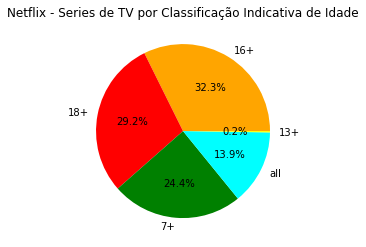

In [107]:
%matplotlib inline

#agora realizamos a visualização em piechart de como os shows da netflix estão
#distribuidos conforme a classificação indicativa de idade
df = pd.read_csv("tv_shows.csv")
df[df.Netflix != 0] = netflix #filtragem para uso dos shows que fazem parte da Netflix
netflix_age = netflix['Age'].value_counts()
labels = ['16+', '18+', '7+', 'all', '13+']
plt.axis("equal")
plt.title("Netflix - Series de TV por Classificação Indicativa de Idade")
colors = ("orange", "red", "green", "cyan", "yellow")
plt.pie(netflix_age, colors=colors, labels=labels, autopct='%1.1f%%')
plt.show()

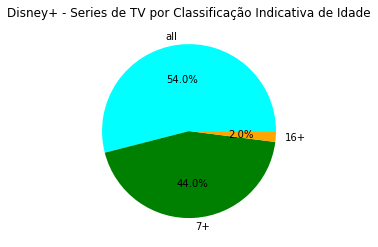

In [109]:
#repetimos o processo para os demais serviços de streaming
#Gráfico dos shows do DisneyPlus por Classificação Indicativa de Idade
df = pd.read_csv("tv_shows.csv")
disney = df[df['Disney+'] != 0]
disney_age = disney['Age'].value_counts()
labels = ['all', '7+', '16+']
plt.axis("equal")
colors = ("cyan", "green", "orange")
plt.pie(disney_age, colors=colors, labels=labels, autopct='%1.1f%%')
plt.title("Disney+ - Series de TV por Classificação Indicativa de Idade")
plt.show()

In [99]:
df = pd.read_csv("tv_shows.csv")
disney = df[df['Disney+'] != 0]
disney_age = disney['Age'].value_counts()
print(disney_age)

all    81
7+     66
16+     3
Name: Age, dtype: int64


In [100]:
df = pd.read_csv("tv_shows.csv")
prime = df[df['Prime Video'] != 0]
prime_age = prime['Age'].value_counts()
print(prime_age)

7+     224
16+    209
all    192
18+    182
13+      1
Name: Age, dtype: int64


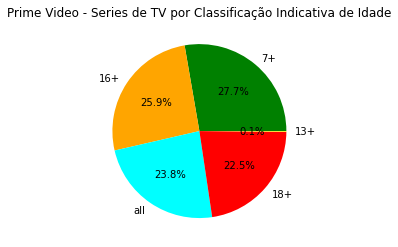

In [112]:
#Gráfico dos shows do Prime Video por Classificação Indicativa de Idade

df = pd.read_csv("tv_shows.csv")
prime = df[df['Prime Video'] != 0]
prime_age = prime['Age'].value_counts()
labels = ['7+', '16+', 'all', '18+', '13+']
colors = ("green", "orange", "cyan", "red", "yellow") 
plt.axis("equal")
plt.pie(prime_age, colors=colors, labels=labels, autopct='%1.1f%%')
plt.title("Prime Video - Series de TV por Classificação Indicativa de Idade")
plt.show()

# Quando foi realizado o primeiro filme

In [124]:
df = pd.read_csv("tv_shows.csv")
df_year = df.set_index("Year")
df_year_sorted = df_year.sort_values(by = "Year", inplace = False, ascending = False)
df_year_sorted.tail(1)

,Unnamed: 0,Title,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,type
Year,,,,,,,,,,
1901,4679,Gods & Monsters with Tony Robinson,NaN,NaN,NaN,0,0,1,0,1


#  Em quantos anos diferentes se realizaram filmes?

In [125]:
list_year = df.Year.unique()
num_year = len(list_year)
print('foram realizados filmes em', num_year,'anos diferentes' )

foram realizados filmes em 81 anos diferentes


# Avaliações por ano

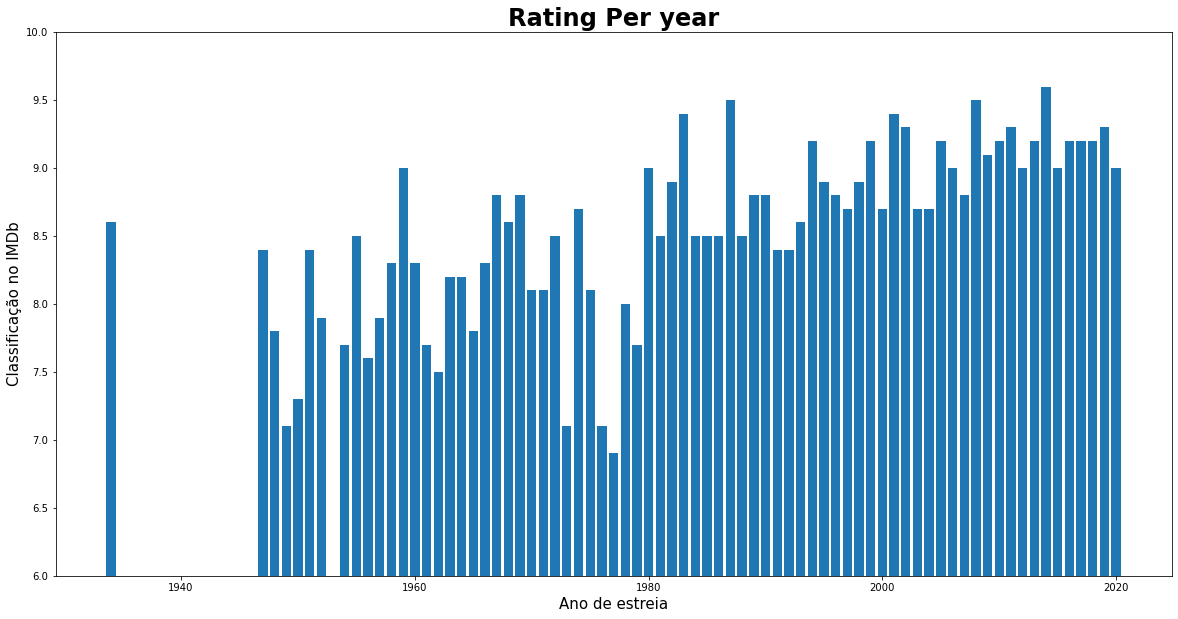

In [127]:
yearList = df["Year"].tolist()
IMDbList = df["IMDb"].tolist()

plt.bar(yearList, IMDbList, label = 'IMDb rating per year')

#custumização do gráfico
plt.xlabel('Ano de estreia', fontsize=15)
plt.ylabel('Classificação no IMDb', fontsize=15)
plt.title('Rating Per year', fontsize=24, fontweight='bold')
plt.ylim(6, 10)
plt.gcf().set_size_inches(20,10) #mudar o tamanho do gráfico
plt.show()